# Classificação de emoções

## Importação das bibliotecas

In [80]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
from google.colab.patches import cv2_imshow
import zipfile
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten, BatchNormalization

from sklearn.model_selection import train_test_split

## Carregamento das imagens

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [81]:
X = np.load("/content/drive/MyDrive/experimento_image_pontos/descritores_CK.npy")

y = np.load("/content/drive/MyDrive/experimento_image_pontos/Rotulos_CK.npy")

In [82]:
type(X)

numpy.ndarray

In [83]:
print(X.shape)

(386, 136)


In [84]:
type(y)

numpy.ndarray

In [85]:
print(y.shape)

(386, 1)


In [ ]:
unique, counts = np.unique(y, return_counts=True)

result = np.column_stack((unique, counts)) 
print (result)

In [86]:
from sklearn.model_selection import train_test_split

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8)

### Bases de treinamento e teste

In [62]:
# x_train = X_train / 255
# y_train = y_train / 136
# x_test = X_test / 255
# y_test = y_test / 136

In [ ]:
print(x_train.shape)

In [41]:
# Plotando a visualização das classes
sns.countplot(x = y_train);

### ============================================================================

## Construção e treinamento da rede neural

In [88]:
# Número de filtros
num_detectors = 32
# Numero e classes
num_classes = 7
# Tamanho da imagem
width, height = 48, 48
# Numero de epocas
epochs = 70

# Implementando a estrutura da rede
network = Sequential()

network.add(Conv2D(num_detectors, (3, 3), activation = 'relu', padding = 'same', input_shape = (width, height, 3)))
network.add(BatchNormalization())
network.add(Conv2D(num_detectors, (3, 3), activation = 'relu', padding = "same"))
network.add(BatchNormalization())
network.add(MaxPooling2D(pool_size=(2, 2)))
network.add(Dropout(0.2))

network.add(Conv2D(2*num_detectors, (3, 3), activation = 'relu', padding="same"))
network.add(BatchNormalization())
network.add(Conv2D(2*num_detectors, (3, 3), activation = 'relu', padding="same"))
network.add(BatchNormalization())
network.add(MaxPooling2D(pool_size=(2, 2)))
network.add(Dropout(0.2))

network.add(Conv2D(2*2*num_detectors, (3, 3), activation = 'relu', padding="same"))
network.add(BatchNormalization())
network.add(Conv2D(2*2*num_detectors, (3, 3), activation = 'relu', padding="same"))
network.add(BatchNormalization())
network.add(MaxPooling2D(pool_size=(2, 2)))
network.add(Dropout(0.2))

network.add(Conv2D(2*2*2*num_detectors, (3, 3), activation = 'relu', padding="same"))
network.add(BatchNormalization())
network.add(Conv2D(2*2*2*num_detectors, (3, 3), activation = 'relu', padding="same"))
network.add(BatchNormalization())
network.add(MaxPooling2D(pool_size=(2, 2)))
network.add(Dropout(0.2))

network.add(Flatten())

# Primeira Camada escondida com 64 neurônios
network.add(Dense(2*num_detectors, activation = 'relu'))
network.add(BatchNormalization())
network.add(Dropout(0.2))

# Segunda camada escondida com 64 neurônios
network.add(Dense(2*num_detectors, activation = 'relu'))
network.add(BatchNormalization())
network.add(Dropout(0.2))

# Camada de saídas que são 7 classes
network.add(Dense(units=num_classes, activation='softmax'))

# Observar a estrutura da rede.
print(network.summary())

NameError: ignored

In [76]:
network.compile(optimizer = 'Adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
network.fit(x_train, epochs=epochs)

# O RESTANTE DO CÓDIGO É PRA FAZER O TESTE DA REDE, PORÉM COM IMAGENS PROPRIAMENTE DITAS.

## Salvando e Carregando a Rede Neural

In [ ]:
#Salvando arquivo json
model_json = network.to_json()
with open('/content/drive/MyDrive/experimento_image/WeigthtsProb/network_emotions_prob.json', 'w') as json_file:
    json_file.write(model_json)

In [ ]:
#Salvando pesos
from keras.models import save_model
network_saved = save_model(network,'/content/drive/MyDrive/experimento_image/WeigthtsProb/weights_emotions_prob.haf5')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/experimento_image/WeigthtsProb/weights_emotions_prob.haf5/assets


In [ ]:
# Abertura dos pesos salvos com sua estrutura
with open('/content/drive/MyDrive/experimento_image/WeigthtsProb/network_emotions_prob.json') as json_file:
    json_saved_model = json_file.read()
json_saved_model

In [ ]:
network_loaded = tf.keras.models.model_from_json(json_saved_model)

network_loaded.load_weights('/content/drive/MyDrive/experimento_image/WeigthtsProb/weights_emotions_prob.haf5')

network_loaded.compile(loss = 'categorical_crossentropy', optimizer = 'Adam', metrics = ['accuracy'])

In [ ]:
network_loaded.summary()

## Avaliação da rede neural

In [ ]:
network.evaluate(dataset_teste)

3589/3589 [==============================] - 850s 237ms/step - loss: 1.5339 - accuracy: 0.5776


[1.533948302268982, 0.5775982141494751]

In [ ]:
previsoes = network.predict(dataset_teste)
previsoes

In [ ]:
# Previsão para o modelo
previsoes = np.argmax(previsoes, axis = 1)
previsoes

array([0, 0, 0, ..., 6, 6, 6])

In [ ]:
# Base de dados
dataset_teste.classes

array([0, 0, 0, ..., 6, 6, 6], dtype=int32)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(dataset_teste.classes, previsoes)

0.5775982167734746

In [ ]:
dataset_teste.class_indices

{'Angry': 0,
 'Disgust': 1,
 'Fear': 2,
 'Happy': 3,
 'Neutral': 4,
 'Sad': 5,
 'Surprise': 6}

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(dataset_teste.classes, previsoes)
cm

array([[299,   9,  57,  13,  54,  55,   4],
       [ 10,  39,   2,   1,   1,   1,   1],
       [ 58,   2, 252,  12,  71,  87,  46],
       [ 15,   2,  20, 766,  38,  23,  15],
       [ 91,  11,  96, 156, 116,  98,  58],
       [ 54,   4,  78,  29, 141, 279,   9],
       [ 13,   0,  49,  14,  11,   7, 322]])

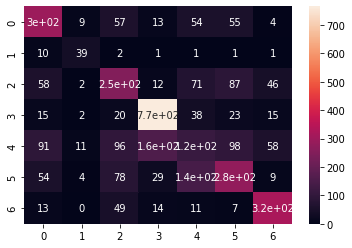

In [ ]:
sns.heatmap(cm, annot=True);

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(dataset_teste.classes, previsoes))

              precision    recall  f1-score   support

           0       0.55      0.61      0.58       491
           1       0.58      0.71      0.64        55
           2       0.45      0.48      0.47       528
           3       0.77      0.87      0.82       879
           4       0.27      0.19      0.22       626
           5       0.51      0.47      0.49       594
           6       0.71      0.77      0.74       416

    accuracy                           0.58      3589
   macro avg       0.55      0.59      0.56      3589
weighted avg       0.55      0.58      0.56      3589



## Classificação de uma única imagem

In [ ]:
# Carregando a imagem
imagem = cv2.imread('/content/drive/MyDrive/experimento imagens/gabriel.png')
cv2_imshow(imagem)

In [ ]:
imagem.shape

In [ ]:
# Capturar somente a parte da face
detector_face = cv2.CascadeClassifier('/content/drive/MyDrive/experimento_image/haarcascade_frontalface_default.xml')

In [ ]:
imagem_original = imagem.copy()
deteccoes = detector_face.detectMultiScale(imagem_original)

In [ ]:
# Indentificação do local da face -> x, y, tamanho da face
deteccoes

In [ ]:
# Extraindo parte necessária -> posição inicial e posição final
roi = imagem[40:40 + 128, 162:162 + 128]
cv2_imshow(roi)

In [ ]:
roi.shape

In [ ]:
# Redimensionando a imagem
roi = cv2.resize(roi, (48, 48))
cv2_imshow(roi)

In [ ]:
roi.shape

In [ ]:
roi

In [ ]:
# Aplicar normalização de escala
roi = roi / 255
roi

In [ ]:
roi.shape

(48, 48, 3)

In [ ]:
# Criação do bath -> quantidade de imagens enviadas a rede = 1
import numpy as np
roi = np.expand_dims(roi, axis = 0)
roi.shape

(1, 1, 128, 128, 3)

In [ ]:
# * Obtendo o resultado da predição
# Gerando probabilidades
probs = network_loaded.predict(roi)
probs

array([[0.01952875, 0.01462624, 0.23866977, 0.01075243, 0.5762978 ,
        0.04924279, 0.0908822 ]], dtype=float32)

In [ ]:
# Indice onde há o maior valor
previsao = np.argmax(probs)
previsao

In [ ]:
# Avaliação final
dataset_teste.class_indices

## Classificação de multiplas imagens

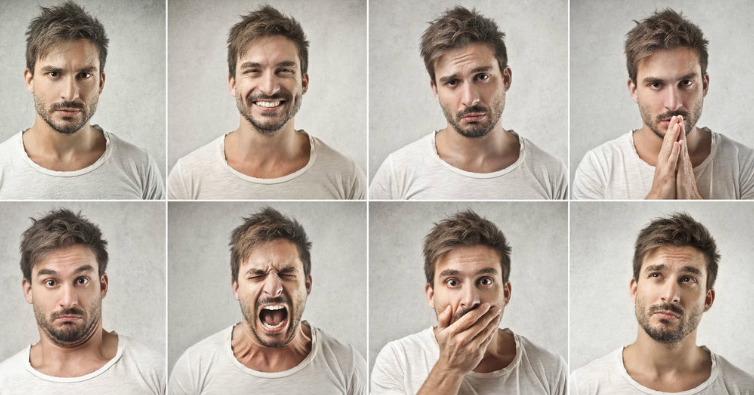

In [ ]:
imagem = cv2.imread('/content/drive/MyDrive/experimento_image/Images/faces_emotions.png')
cv2_imshow(imagem)

In [ ]:
# Capturar somente a parte da face
detector_face = cv2.CascadeClassifier('/content/drive/MyDrive/experimento_image/haarcascade_frontalface_default.xml')

In [ ]:
deteccoes = detector_face.detectMultiScale(imagem)
deteccoes

array([[224,  35,  90,  90],
       [625,  49,  91,  91],
       [ 23,  41,  92,  92],
       [420,  43,  97,  97],
       [420, 242,  97,  97],
       [ 18, 243,  98,  98],
       [229, 242,  85,  85],
       [627, 241,  91,  91]], dtype=int32)

In [ ]:
dataset_teste.class_indices

{'Angry': 0,
 'Disgust': 1,
 'Fear': 2,
 'Happy': 3,
 'Neutral': 4,
 'Sad': 5,
 'Surprise': 6}

In [ ]:
dataset_teste.class_indices.keys()

dict_keys(['Angry', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprise'])

In [ ]:
emotions = ['Angry', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprise']

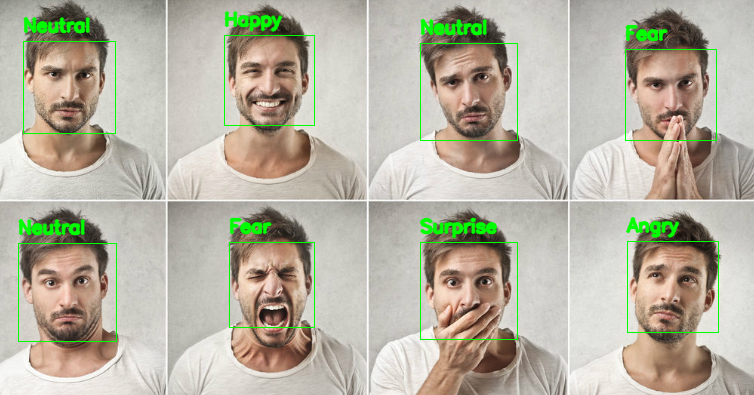

In [ ]:
# Valores dos boxs
for (x, y, w, h) in deteccoes:
    #print(x, y, w, h)
    ## Extraindo o roi, região de interesse
    cv2.rectangle(imagem, (x, y), (x + w, y + h), (0, 255, 0), 1)
    roi = imagem[y:y + h, x:x + w]
    #cv2_imshow(roi)
    roi = cv2.resize(roi, (48, 48))
    #cv2_imshow(roi)
    ## Normalização
    roi = roi / 255
    roi = np.expand_dims(roi, axis = 0)
    #print(roi.shape)
    previsao = network_loaded.predict(roi)
    #print(previsao)
    ## Adicionar o texto na imagem - argmax retorna o índice - por meio do índice acessamos a emoção
    cv2.putText(imagem, emotions[np.argmax(previsao)], (x, y -10), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2, cv2.LINE_AA)
cv2_imshow(imagem)